# Spotify Genre Classification 

## Getting the Data - Scraping and Spotify API

### explaining the functions of API:
the target : to create a dataFrame that contains the information from the billabord charts and from spotify. 

In [2]:
# libraries for scraping
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import requests 
import scipy.stats as stats
import datetime
import base64
import warnings
warnings.filterwarnings("ignore")

In [4]:
def scrape(url):
    page = urlopen(url)
    soup = BeautifulSoup(page)
    right_table = soup.find('table', class_='wikitable sortable')
    #Generate lists
    A=[]
    B=[]
    C=[]
    
    for row in right_table.findAll("tr"):
        cells = row.findAll('td')
        if len(cells)==3: #Only extract table body not heading
            A.append(cells[0].find(text=True))
            B.append(cells[1].find('a').find(text=True))
            C.append(cells[2].find('a').find(text=True))
    df = pd.DataFrame(A,columns=['No.'])
    df['Title'] = B
    df['Artist(s)'] = C
    return df

In [5]:
url0 = 'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2010'
url201 = 'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_201'
url200 = 'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_200'

df = scrape(url0)
for i in range(1,10):
    print(url201+str(i))
    df_to_append = scrape(url201+str(i))
    df = df.append(df_to_append)
for i in range(0,10):
    print(url200+str(i))
    try:
        df_to_append = scrape(url200+str(i))
        df = df.append(df_to_append)
    except:
        print("skip")
df

https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2011
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2012
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2013
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2014
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2015
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2016
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2017
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2018
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2019
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2000
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2001
skip
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2002
skip
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2003
skip
https://en.wikipedia.org/wiki/Billbo

,No.,Title,Artist(s)
0,1,Tik Tok,Kesha
1,2,Need You Now,Lady Antebellum
2,3,"Hey, Soul Sister",Train
3,4,California Gurls,Katy Perry
4,5,OMG,Usher
...,...,...,...
95,96,Goodbye,Kristinia DeBarge
96,97,Say Hey (I Love You),Michael Franti & Spearhead
97,98,Pop Champagne,Jim Jones
98,99,Pretty Wings,Maxwell


In [7]:

clientid = '4d7f3ed374354cbf848b72bc270abedd'
secretid = '7c9935d59cbc417e8ac74ad8d7e06a6e'
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2019')
print(f'Total tables: {len(table_MN)}')
df1 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2018')
df2 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2017')
df3 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2016')
df4 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2015')
df5 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2014')
df6 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2013')
df7 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2012')
df8 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2011')
df9 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2010')
# df10 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2009')
# df11 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2008')
# df12 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2007')
# df13 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2006')
# df14 = table_MN[0]

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
#           ,df10 ,df11 ,df12 ,df13 ,df14]


## todo: get more data, and really scrape this.
all_songs_list = pd.concat(frames)
all_songs_list = df

Total tables: 2


In [8]:
all_songs_list

,No.,Title,Artist(s)
0,1,Tik Tok,Kesha
1,2,Need You Now,Lady Antebellum
2,3,"Hey, Soul Sister",Train
3,4,California Gurls,Katy Perry
4,5,OMG,Usher
...,...,...,...
95,96,Goodbye,Kristinia DeBarge
96,97,Say Hey (I Love You),Michael Franti & Spearhead
97,98,Pop Champagne,Jim Jones
98,99,Pretty Wings,Maxwell


In [9]:
# sp.search("lsdjlk asfklfafas", limit=1,type='track')

In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [11]:
cid = "3b41c863d85746899b1bd17a39149f8e"
secret = "631b736a77d545e4a822bea470435cea"

In [12]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [13]:
# getting the entity of the song - it has features such as the rank, artist name and track name from the wikepdia billabord pages
# then, we will use this in order to find the spotify data
# song_entity is a dictionary that holds the values i wrote above and also have some of the tracks' indormation
# song_results - list, keeping all the songs' entities

import re

song_results = []
for index, row in all_songs_list.iterrows():
    song_rank = row['No.']
    artist_original_name = row['Artist(s)']
    # taking care of cases where there are multiple artists in a song
    artist_names = re.split('featuring | and | ,',artist_original_name)
    artist_names.append(artist_original_name)
    #taking care of cases where the band name has the word 'and'
    for name in artist_names:
        query = "track:"+row['Title']+" artist:"+name
        query = query.replace('"','')
        search_result = sp.search(query, limit=1,type='track')
        if len(search_result['tracks']['items']) != 0:
            song_entity ={'rank':song_rank,'result':search_result}
            song_results.append(song_entity)
            break
#         song_queries.append(query)

<!-- #### get the artist/band name , in order to search for the song title in the find_id() function -->

In [14]:
# getting the spotify features using song_result
def get_song_features(song_entity):
    search_result = song_entity['result']
    track_uri = search_result['tracks']['items'][0]['uri']
    #additional features for what we've got so far using the track_uri
    track_features = sp.audio_features(track_uri)[0]
    artist_id = search_result['tracks']['items'][0]['artists'][0]['id']
    artist_info = sp.artist(artist_id)
    artist_popularity = artist_info['popularity']
    artist_genre = artist_info['genres'][0]
    
    features = track_features
    features['genre'] = artist_genre
    features['popularity'] = artist_popularity
    features['rank'] = song_entity['rank']

    return features

In [15]:


# creating a data frame uding song_entities.

def get_songs_df(song_entities):
    song_list = []
    for ent in song_entities:
        try:
            # adding each features of a song to the list
            song_features = get_song_features(ent)
            song_list.append(song_features)
        except:
            print(ent['result'])
            print("song was not found!")
    
    return pd.DataFrame(song_list)

# Introduction to the problem

### What is Classification?

A classification algorithm takes a dataset of labelled examples as inputs to produce a model that can take unlabeled new data and automatically assign labels to the unlabeled example.

If the classification problem has a set of two labels (for instance “spam” or “not spam”) then it is a binary classification problem. Multi-class classification is a problem where the number of labels within the set is three or greater. 

The problem that we are looking at is a multi-class as there are many genres within the set.

### our independent features/variables: 

#### A. from spotify API track info:
       
* danceability - “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

* energy - “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.

* key  (integer) - the key the track is in .  Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and                 so   on. If no key was detected, the value is -1.

* loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typically range between -60 and 0 db.

* mode   (integer)- a Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.                  Major is  represented by 1 and minor is 0.

* speechiness - Speechiness detects the presence of spoken words in a track

* acousticness - This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

* instrumentalness - This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.

* liveness -This value describes the probability that the song was recorded with a live audience. According to the official documentation “a             value above 0.8 provides strong likelihood that the track is live”. this and energy feature aren't the same!

* valance -  “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more             positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

* tempo -The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece       and derives directly from the average beat duration.

* time_signature (integer) - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

* duration_ms (time) - this and tempo feature are alike, we don't need both. remove one of them

* type - audio_features

* id - id of track

* uri - 

* track_href - link to track

* analysis_url       


#### B. from spotify API artist info:


* popularity (integer) - The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's                             popularity is calculated from the popularity of all the artist's tracks.

  


#### C. from billaboard charts' scraping: 
   *  rank- song position on the chart 
     

## What is the target column?
our target column (dependent feature): genre
    
genre is the music type which the song is accosiated to
in the data aquisition process, we only took the first genre the song is accosiated to.

we took it from the artist info in spotify

our aprior ideas:
   
   * the features danceability, energy, loudness ,instrumentalness ,speechiness, liveness, popularity and tempo have high             correlation with each other, so they are good features to use in order to classify the songs' genre.
    this is due to the fact that those features are linked very strongly to specific genres.
    
for example, a pop song has a big likelihood to have high danceability, energy, loudness and pop (popularity), whereas a rock song has a big likelihood to have high loudness and instrumentalness, in comparison to a country song that is likely to have low loudness and high acousticness	.

* the rank feature may be helpful to classify the songs' genre since we know that most of the songs that has high ranking are classified as pop songs or rap/hip hop songs.


#  getting to know the data

In [16]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#for preprocessing part
from scipy import stats

In [17]:
#DataFrame of all our songs

songs_df = get_songs_df(song_results)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AImma+Be+artist%3AThe+Black+Eyed+Peas&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4USFzlJddHfaZpNeXN0JPn'}, 'href': 'https://api.spotify.com/v1/artists/4USFzlJddHfaZpNeXN0JPn', 'id': '4USFzlJddHfaZpNeXN0JPn', 'name': 'The Future Hit Makers', 'type': 'artist', 'uri': 'spotify:artist:4USFzlJddHfaZpNeXN0JPn'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AMeet+Me+Halfway+artist%3AThe+Black+Eyed+Peas&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4USFzlJddHfaZpNeXN0JPn'}, 'href': 'https://api.spotify.com/v1/artists/4USFzlJddHfaZpNeXN0JPn', 'id': '4USFzlJddHfaZpNeXN0JPn', 'name': 'The Future Hit Makers', 'type': 'artist', 'uri': 'spotify:artist:4USFzlJddHfaZpNeXN0JPn'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', '

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AJust+Can%27t+Get+Enough+artist%3AThe+Black+Eyed+Peas&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2sRLpduglJUzDQNnrsJudx'}, 'href': 'https://api.spotify.com/v1/artists/2sRLpduglJUzDQNnrsJudx', 'id': '2sRLpduglJUzDQNnrsJudx', 'name': 'The Singles', 'type': 'artist', 'uri': 'spotify:artist:2sRLpduglJUzDQNnrsJudx'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AThe+Time+%28Dirty+Bit%29+artist%3AThe+Black+Eyed+Peas&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gOdU6Z2qCcy7x63Fcpt2C'}, 'href': 'https://api.spotify.com/v1/artists/4gOdU6Z2qCcy7x63Fcpt2C', 'id': '4gOdU6Z2qCcy7x63Fcpt2C', 'name': 'The Great Pop Crew', 'type': 'artist', 'uri': 'spotify:artist:4gOdU6Z2qCcy7x63Fcpt2C'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', '

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AJust+Give+Me+a+Reason+artist%3APink&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3DLBeeEyKKtxTtvEip8PrK'}, 'href': 'https://api.spotify.com/v1/artists/3DLBeeEyKKtxTtvEip8PrK', 'id': '3DLBeeEyKKtxTtvEip8PrK', 'name': 'Pinkdance', 'type': 'artist', 'uri': 'spotify:artist:3DLBeeEyKKtxTtvEip8PrK'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AI%27m+Not+the+Only+One+artist%3ASam+Smith&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE'

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AI+Hate+U%2C+I+Love+U+artist%3AGnash&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'}, 'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of', 'id': '0LyfQWJT6nXafLPZqxe9Of', 'name': 'Various Artists', 'type': 'artist', 'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH'

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AWhat+About+Us+artist%3APink&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6P7WRF75IwcYANajwZGyfq'}, 'href': 'https://api.spotify.com/v1/artists/6P7WRF75IwcYANajwZGyfq', 'id': '6P7WRF75IwcYANajwZGyfq', 'name': 'The Pink Singers', 'type': 'artist', 'uri': 'spotify:artist:6P7WRF75IwcYANajwZGyfq'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI',

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AFuck+It+%28I+Don%27t+Want+You+Back%29+artist%3AEamon&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1y20PpXw0yeuJ1avCD0Ob9'}, 'href': 'https://api.spotify.com/v1/artists/1y20PpXw0yeuJ1avCD0Ob9', 'id': '1y20PpXw0yeuJ1avCD0Ob9', 'name': 'Eamon', 'type': 'artist', 'uri': 'spotify:artist:1y20PpXw0yeuJ1avCD0Ob9'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CD', 'CG', 'CH', 'CI', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KW

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AHappy+People+artist%3AR.+Kelly&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2mxe0TnaNL039ysAj51xPQ'}, 'href': 'https://api.spotify.com/v1/artists/2mxe0TnaNL039ysAj51xPQ', 'id': '2mxe0TnaNL039ysAj51xPQ', 'name': 'R. Kelly', 'type': 'artist', 'uri': 'spotify:artist:2mxe0TnaNL039ysAj51xPQ'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM'

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AGoin%27+Crazy+artist%3ANatalie&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4lFOyLUXnV2Emuus9X8xpA'}, 'href': 'https://api.spotify.com/v1/artists/4lFOyLUXnV2Emuus9X8xpA', 'id': '4lFOyLUXnV2Emuus9X8xpA', 'name': 'Natalie', 'type': 'artist', 'uri': 'spotify:artist:4lFOyLUXnV2Emuus9X8xpA'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BA', 'BD', 'BE', 'BG', 'BH', 'BO', 'BR', 'BY', 'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GN', 'GR', 'GT', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LI', 'LK', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'ME', 'MK', 'MU', 'MY', 'NG', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PT', 'PY', 'QA', 'RO', 'RS', 'RW', 'SA', 'SE', 'SG',

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AWait+for+You+artist%3AElliott+Yamin&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4am1I89OWXUzFh4ctRLkdd'}, 'href': 'https://api.spotify.com/v1/artists/4am1I89OWXUzFh4ctRLkdd', 'id': '4am1I89OWXUzFh4ctRLkdd', 'name': 'Elliott Yamin', 'type': 'artist', 'uri': 'spotify:artist:4am1I89OWXUzFh4ctRLkdd'}], 'available_markets': ['AD', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'BA', 'BB', 'BE', 'BF', 'BG', 'BI', 'BJ', 'BO', 'BR', 'BS', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HN', 'HR', 'HT', 'HU', 'IE', 'IL', 'IS', 'IT', 'JM', 'KE', 'KG', 'KI', 'KM', 'KN', 'KZ', 'LC', 'LI', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3APut+On+artist%3AYoung+Jeezy&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1IPsBfROlpBtovI9FoV5Lr'}, 'href': 'https://api.spotify.com/v1/artists/1IPsBfROlpBtovI9FoV5Lr', 'id': '1IPsBfROlpBtovI9FoV5Lr', 'name': "Young Jeezy aka Lil' J", 'type': 'artist', 'uri': 'spotify:artist:1IPsBfROlpBtovI9FoV5Lr'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM',

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3AI+Gotta+Feeling+artist%3AThe+Black+Eyed+Peas&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4ZTRQ8ljXtkAqgyDLbgUSe'}, 'href': 'https://api.spotify.com/v1/artists/4ZTRQ8ljXtkAqgyDLbgUSe', 'id': '4ZTRQ8ljXtkAqgyDLbgUSe', 'name': 'The Kid All-Stars', 'type': 'artist', 'uri': 'spotify:artist:4ZTRQ8ljXtkAqgyDLbgUSe'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG',

In [18]:
# songs_df.to_csv("C:\\Users\\User\\Desktop\\final-project\\realProject\\songs.csv")

In [19]:
songs_df = pd.read_csv("C:\\Users\\User\\Desktop\\final-project\\realProject\\songs.csv")

In [20]:
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,...,audio_features,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,dance pop,82,1
1,1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,...,audio_features,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,contemporary country,72,2
2,2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,...,audio_features,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,dance pop,77,3
3,3,0.788,0.753,0,-3.710,1,0.0536,0.00380,0.000000,0.1800,...,audio_features,6KOEK6SeCEZOQkLj5M1PxH,spotify:track:6KOEK6SeCEZOQkLj5M1PxH,https://api.spotify.com/v1/tracks/6KOEK6SeCEZO...,https://api.spotify.com/v1/audio-analysis/6KOE...,234653,4,dance pop,88,4
4,4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,...,audio_features,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,atl hip hop,83,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.777,0.820,1,-3.211,0,0.0471,0.00505,0.000026,0.1420,...,audio_features,5myYDbAurm1CW038qd4gL2,spotify:track:5myYDbAurm1CW038qd4gL2,https://api.spotify.com/v1/tracks/5myYDbAurm1C...,https://api.spotify.com/v1/audio-analysis/5myY...,208133,4,dance pop,41,96
1599,1599,0.738,0.983,5,-4.374,0,0.0852,0.03760,0.000006,0.1830,...,audio_features,383B8ksM58jbV3HbiRJo0K,spotify:track:383B8ksM58jbV3HbiRJo0K,https://api.spotify.com/v1/tracks/383B8ksM58jb...,https://api.spotify.com/v1/audio-analysis/383B...,235760,4,reggae fusion,59,97
1600,1600,0.610,0.431,0,-6.730,1,0.2940,0.03000,0.000000,0.0990,...,audio_features,5lrOsw7J8R7shum7A4j36t,spotify:track:5lrOsw7J8R7shum7A4j36t,https://api.spotify.com/v1/tracks/5lrOsw7J8R7s...,https://api.spotify.com/v1/audio-analysis/5lrO...,215973,3,gangster rap,62,98
1601,1601,0.563,0.402,9,-10.496,1,0.0668,0.25200,0.000002,0.0886,...,audio_features,22NLm3IIR9NLG0cUYtmHMW,spotify:track:22NLm3IIR9NLG0cUYtmHMW,https://api.spotify.com/v1/tracks/22NLm3IIR9NL...,https://api.spotify.com/v1/audio-analysis/22NL...,310520,4,contemporary r&b,62,99


#  preprocessing of the data

In [24]:
songs_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0,0.755,0.837,2,-2.718,0,0.1420,0.0991,0.000000,0.2890,...,audio_features,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,dance pop,82,1
1,1,0.587,0.622,4,-5.535,1,0.0303,0.0927,0.000636,0.2000,...,audio_features,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,contemporary country,72,2
2,2,0.673,0.886,1,-4.440,0,0.0431,0.1850,0.000000,0.0826,...,audio_features,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,dance pop,77,3
3,3,0.788,0.753,0,-3.710,1,0.0536,0.0038,0.000000,0.1800,...,audio_features,6KOEK6SeCEZOQkLj5M1PxH,spotify:track:6KOEK6SeCEZOQkLj5M1PxH,https://api.spotify.com/v1/tracks/6KOEK6SeCEZO...,https://api.spotify.com/v1/audio-analysis/6KOE...,234653,4,dance pop,88,4
4,4,0.781,0.745,4,-5.810,0,0.0332,0.1980,0.000011,0.3600,...,audio_features,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,atl hip hop,83,5


In [25]:
pd.DataFrame(data={'features': songs_df.columns})

,features
0,Unnamed: 0
1,danceability
2,energy
3,key
4,loudness
5,mode
6,speechiness
7,acousticness
8,instrumentalness
9,liveness


## dealing with null values

In [26]:
songs_df.isnull().any()

Unnamed: 0          False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
genre               False
popularity          False
rank                False
dtype: bool

In [27]:
# # import missingno as msno
# # msno.bar(songs_df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# songs_df["genre"].isnull().value_counts()
# dropping NULL values
songs_df = songs_df.dropna(axis=0)

In [28]:
songs_df["genre"].isnull().value_counts()

False    1603
Name: genre, dtype: int64

we see that there are a lot of dirrerent genres, so we will reduce them: 

In [29]:
# coverting sub-genres to main genre
def replace_genre(genre,song,index,songs_df):
    if genre in song['genre']:
        song['genre'] = genre
        songs_df.loc[index] = song

In [30]:
# coverting sub-genre to "soul/r&b" genre
def replace_genre2(genre,song,index,songs_df):
    sp_gen=genre.split("/")
    if ((sp_gen[0] in song['genre']) | (sp_gen[1] in song['genre']) ):
        song['genre'] = genre
        songs_df.loc[index] = song

In [32]:
# calling replace_genre method
for index, song in songs_df.iterrows():
    replace_genre("hip hop",song,index,songs_df)
    replace_genre("rap",song,index,songs_df)
    replace_genre("pop",song,index,songs_df)
    replace_genre("rock",song,index,songs_df)
    replace_genre("country",song,index,songs_df)
    replace_genre("dance",song,index,songs_df)
#     replace_genre("jazz",song,index,songs_df)
    replace_genre2("soul/r&b",song,index,songs_df)
    replace_genre("funk",song,index,songs_df)
    

In [33]:
# to make sure we didn't miss any genre
songs_df = songs_df.replace({'genre': {"album rock": "rock", "glam rock": "rock", "dance rock":"rock", "art rock":"rock",
                                  "soft rock":"rock", "country rock": "rock", "classic rock":"rock", "blues rock":"rock", "celtic rock":"rock",
                                  "australian rock":"rock", "german alternative rock":"rock", "alternative rock":"rock", "dance pop":"pop",
                                "brill building pop": "pop", "europop": "pop", "barbadian pop": "pop", "classic uk pop":"pop", 
                                "new wave pop":"pop", "canadian pop":"pop", "art pop":"pop", "belgian pop": "pop", "britpop": "pop", 
                                "italian pop":"pop", "classic danish pop": "pop", "bow pop": "pop", "baroque pop": "pop", "bubblegum pop": "pop",
                                "afropop":"pop", "hip pop":"pop", "atl hip hop": "hip hop", "east coast hip hop": "hip hop", "detroit hip hop":"hip hop", 
                                "bronx hip hop": "hip hop", "bubblegum dance": "dance", "eurodance":"dance", "belgian dance":"dance", "german dance": "dance",
                                "classic soul": "soul/r&b", "british soul": "soul/r&b", "chicago soul": "soul/r&b", "british folk": "folk", "american folk revival":"folk",
                                "drone folk":"folk","canadian folk":"folk", "deep adult standards":"adult standards", "glam metal": "metal", "alternative metal": "metal",
                                "acoustic blues":"blues", "british blues":"blues", "louisiana blues":"blues", "g funk":"funk", "brit funk":"funk",
                                "afrobeat":"dance", "british invasion":"rock", "doo-wop":"blues", "boy band":"pop", "merseybeat":"rock-and-roll", "blue":"blues",
                                                "bebop":"jazz", "avant-garde jazz":"jazz", "boogaloo": "latin", "big room": "trance", "bubble trance":"trance", "glam punk":"rock",
                                                "australian talent show":"pop", "mellow gold":"rock", "hi-nrg": "dance", "neo mellow": "pop", "yodeling":"folk", "classic girl group":"pop",
                                                "british dance band":"jazz", "deep house":"dance", "uk garage": "dance", "chicago rap":"hip hop",
                                     "lgbtq+ hip hop":"hip hop", "dfw rap": "hip hop", "contemporary country":"country","canadian contemporary r&b":"contemporary r&b","alternative r&b":"contemporary r&b","neo soul":"soul","uk dance":"dance","australian dance":"dance","alternative dance":"dance","romanian house":"dance","german house":"dance","tropical house":"dance","chicago bop":"jazz","complextro":"dance","emo":"rock","indie":"rock","indietronica":"rock","hollywood":"pop",
                                       "black americana":"black music", "alt z":"dance","trance":"dance","brostep":"dance","soul":"soul/r&b","contemporary r&b ":"soul/r&b", "irish singer-songwriter":"singer-songwriter","electro":"dance","electronic":"dance","edm":"dance","reggae fusion":"reggae"       
                                      
                                      
                                      }})

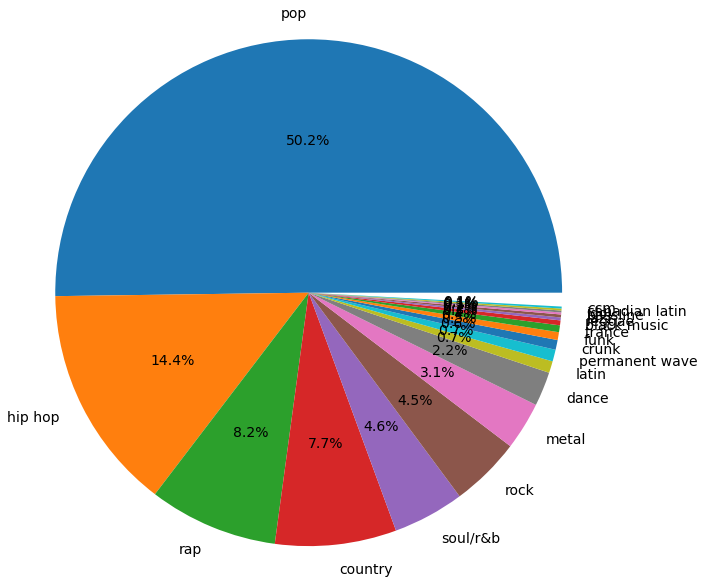

In [34]:
# a pie that represent the distribution of the genres, before we made the more specific reducing of genres 
df_genre = songs_df['genre'].value_counts()[:20].sort_values(ascending=False) / len(songs_df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
# plt.title("Most Popular Genres\n" , bbox={'facecolor':'0.8', 'pad':0})
plt.show()

conclusion from the pie chart:
 pop, rap,hip hop and country are the most popular genres in the billaboard charts, by far from the other genres.
 
we can see that there are a lot of different genres, and we can get rid of some, since a lot of genres here are sub-genres of others.

# Improving the genre feature and get rid of outliers

In [35]:
songs_df['genre']

0            pop
1        country
2            pop
3            pop
4        hip hop
          ...   
1598         pop
1599      reggae
1600         rap
1601    soul/r&b
1602         pop
Name: genre, Length: 1603, dtype: object

In [36]:
# ser=songs_df['genre']
# for genre in ser:
# #     if (songs_df['genre']==songs_df['genre'].all())
# #         songs_df.drop(label=genre)
#     if bool([ser.value_counts()<3]):
#             print(genre)
#             ser.drop(labels=genre)
        

In [37]:
songs_df['genre'].unique()

array(['pop', 'country', 'hip hop', 'rap', 'trance', 'rock', 'dance',
       'metal', 'soul/r&b', 'funk', 'permanent wave', 'la indie',
       'black music', 'comic', 'reggae', 'jazz', 'singer-songwriter',
       'orchestral soundtrack', 'latin', 'lullaby', 'ccm', 'cartoon',
       'deep latin christian', 'crunk', 'afrofuturism', 'gospel',
       'bounce', 'soca', 'lilith', 'karaoke', 'canadian latin', 'fake',
       'idol', 'bassline'], dtype=object)

## Reducing Genres

I built a function that drop genres that belong to less than 3 songs from the genre cloumn. 

we will also use those functions later on the dependent train set (Y_train), in order to remove another outliers  

In [38]:
# # find all the outliers keys' of genre feature, i.e the keys of the genres that belongs to less than 3 songs
# def find_position(ser,specific_genre):
#     for key,genre in ser.iteritems():
#         if(genre==specific_genre):
#             return(key) 

In [39]:
# make list of genres to drop from songs_df['genre']
def make_lst(ser,lst,num):
    for genre,count in ser.value_counts().iteritems():
        if bool(count<num):
    #         list.append(genre)
#               pos=find_position(ser,genre)
              lst.append(genre)
    return lst  

In [40]:
# dropping the genres that are not in dropped.keys()
def drop_row_genre(ser,h):
    for index,genre in songs_df['genre'].iteritems():
        if genre not in h.keys():
            songs_df['genre']=songs_df['genre'].drop(index) 
    return songs_df['genre']
    

In [41]:
songs_df['genre']

0            pop
1        country
2            pop
3            pop
4        hip hop
          ...   
1598         pop
1599      reggae
1600         rap
1601    soul/r&b
1602         pop
Name: genre, Length: 1603, dtype: object

In [42]:
#two lists, because we will need do double check the genre column to see if there are more outliers
list=[]
list2=[]


In [43]:
list=make_lst(songs_df['genre'],list,3)

In [44]:
list

['bassline',
 'idol',
 'canadian latin',
 'ccm',
 'deep latin christian',
 'comic',
 'afrofuturism',
 'cartoon',
 'gospel',
 'soca',
 'karaoke',
 'la indie',
 'lullaby',
 'lilith',
 'fake',
 'singer-songwriter',
 'bounce',
 'orchestral soundtrack']

In [45]:
dropped= songs_df['genre'].value_counts().drop(list)

In [46]:
dropped.keys()

Index(['pop', 'hip hop', 'rap', 'country', 'soul/r&b', 'rock', 'metal',
       'dance', 'latin', 'permanent wave', 'crunk', 'funk', 'trance',
       'black music', 'reggae', 'jazz'],
      dtype='object')

In [47]:
# calling drop_row_genre(ser,h)
#ser - songs_df['genre']
#h - dropped 

drop_row_genre(songs_df['genre'],dropped)

0            pop
1        country
2            pop
3            pop
4        hip hop
          ...   
1598         pop
1599      reggae
1600         rap
1601    soul/r&b
1602         pop
Name: genre, Length: 1603, dtype: object

In [48]:
songs_df['genre'].value_counts()


pop               805
hip hop           231
rap               132
country           124
soul/r&b           73
rock               72
metal              49
dance              35
permanent wave     12
latin              12
crunk              10
funk                8
trance              7
black music         5
jazz                3
reggae              3
Name: genre, dtype: int64

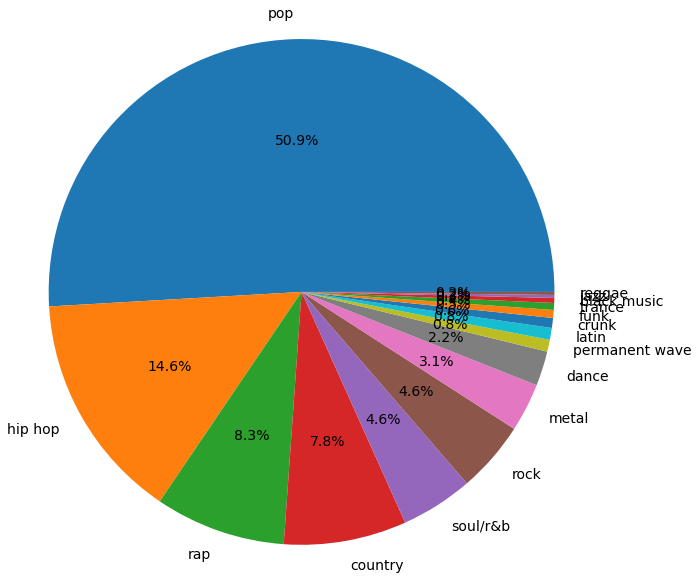

In [49]:
# a pie that represent the distribution of the genres, after we made the more specific reducing of genres 
songs_df=songs_df.dropna()
df_genre = songs_df['genre'].value_counts()[:20].sort_values(ascending=False) / len(songs_df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
# plt.title("Most Popular Genres\n" , bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [50]:
# now , we need do drop all the rows with the null values. this accured because we deleted the outliers in the genres
songs_df=songs_df.dropna()

In [51]:
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,...,audio_features,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,pop,82,1
1,1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,...,audio_features,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,country,72,2
2,2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,...,audio_features,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,pop,77,3
3,3,0.788,0.753,0,-3.710,1,0.0536,0.00380,0.000000,0.1800,...,audio_features,6KOEK6SeCEZOQkLj5M1PxH,spotify:track:6KOEK6SeCEZOQkLj5M1PxH,https://api.spotify.com/v1/tracks/6KOEK6SeCEZO...,https://api.spotify.com/v1/audio-analysis/6KOE...,234653,4,pop,88,4
4,4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,...,audio_features,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,hip hop,83,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.777,0.820,1,-3.211,0,0.0471,0.00505,0.000026,0.1420,...,audio_features,5myYDbAurm1CW038qd4gL2,spotify:track:5myYDbAurm1CW038qd4gL2,https://api.spotify.com/v1/tracks/5myYDbAurm1C...,https://api.spotify.com/v1/audio-analysis/5myY...,208133,4,pop,41,96
1599,1599,0.738,0.983,5,-4.374,0,0.0852,0.03760,0.000006,0.1830,...,audio_features,383B8ksM58jbV3HbiRJo0K,spotify:track:383B8ksM58jbV3HbiRJo0K,https://api.spotify.com/v1/tracks/383B8ksM58jb...,https://api.spotify.com/v1/audio-analysis/383B...,235760,4,reggae,59,97
1600,1600,0.610,0.431,0,-6.730,1,0.2940,0.03000,0.000000,0.0990,...,audio_features,5lrOsw7J8R7shum7A4j36t,spotify:track:5lrOsw7J8R7shum7A4j36t,https://api.spotify.com/v1/tracks/5lrOsw7J8R7s...,https://api.spotify.com/v1/audio-analysis/5lrO...,215973,3,rap,62,98
1601,1601,0.563,0.402,9,-10.496,1,0.0668,0.25200,0.000002,0.0886,...,audio_features,22NLm3IIR9NLG0cUYtmHMW,spotify:track:22NLm3IIR9NLG0cUYtmHMW,https://api.spotify.com/v1/tracks/22NLm3IIR9NL...,https://api.spotify.com/v1/audio-analysis/22NL...,310520,4,soul/r&b,62,99


# dropping unnecessary features

In [52]:
songs_df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'genre', 'popularity', 'rank'],
      dtype='object')

In [53]:
#type has  only one value -  audio features , so we will drop it
songs_df['type']

0       audio_features
1       audio_features
2       audio_features
3       audio_features
4       audio_features
             ...      
1598    audio_features
1599    audio_features
1600    audio_features
1601    audio_features
1602    audio_features
Name: type, Length: 1581, dtype: object

In [54]:
#'id', 'uri', 'track_href', 'analysis_url',''Unnamed: 0'' aren't linked to the song genre at all, so we can drop them 

In [55]:
songs_df=songs_df.drop(columns=['type','id', 'uri','track_href','analysis_url','Unnamed: 0'])

# Dealing with Catagorials

the only Catagorial feature is out target variable - genre

* since we are doing the classification of a polytomous nominal variable (variable with more than two observed values),
  we don't need to encode this catagorial feature, but to choose appropriate multi-class model for nominal data, i.e, a       model that will consider in the fact that the target is catagorial.


* SciKit Learn’s Logistic Regression algorithm offers two different options for handling multiple classes, ‘ovr’ or     ‘multinomial’, to estimate the regressors. so we will use multi_class='ovr'


* OVR, the acronym for One-Versus-Rest, fits a binary regression for each label of your dependent variable comparing the log-odds of that label to all other labels combined. The multinomial option creates a series of binary regressions comparing each class label to all others class labels individually. For a dependent variable with k labels, ovr fits k number of models while multinomial fits (k)*(k-1)/(2) number of models.

# train test split

In [56]:
X = songs_df.drop(['genre'],axis=1)
Y = songs_df['genre']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [58]:
Y_train

367            country
265            country
287                pop
1586           country
360                pop
             ...      
1145    permanent wave
1310               pop
865               rock
1481               pop
1141          soul/r&b
Name: genre, Length: 1185, dtype: object

In [59]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,rank
367,0.543,0.837,11,-6.448,1,0.0608,0.11700,0.000000,0.0872,0.506,168.056,186080,4,77,90
265,0.535,0.560,4,-6.586,1,0.0901,0.28700,0.000000,0.2090,0.785,164.170,223387,4,71,82
287,0.574,0.512,5,-6.664,0,0.0503,0.23400,0.000000,0.0946,0.512,76.899,484147,4,83,6
1586,0.493,0.643,0,-5.190,1,0.0299,0.51200,0.000024,0.2090,0.300,144.704,321640,4,70,84
360,0.577,0.576,2,-6.299,1,0.0563,0.01430,0.000000,0.6020,0.120,133.973,234040,4,74,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,0.496,0.682,8,-4.095,1,0.0294,0.00552,0.000029,0.0589,0.474,167.060,262333,4,83,7
1310,0.800,0.502,1,-6.062,1,0.0371,0.00167,0.000000,0.0784,0.388,115.091,289760,4,90,86
865,0.579,0.904,5,-2.729,1,0.0618,0.19300,0.000000,0.0640,0.681,82.014,190947,4,82,11
1481,0.667,0.954,2,-3.462,1,0.0817,0.02960,0.000000,0.3310,0.807,114.030,175093,4,80,73


# Scaling

The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless.

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [61]:
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

In [62]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

In [63]:
numerical_features=['danceability','energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'popularity', 'rank']

In [64]:
# scaler_standard.fit(X_train[numerical_features])
# X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# # the scaling is with the the same fitted scaler (by the train data)
# X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

In [65]:
# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])



In [66]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,rank
mean,4.500619e-17,1.573050e-16,3.107219e-16,1.474676e-16,1.810085e-16,-1.570357e-16,3.279140e-17,-1.265514e-16,-4.707908e-17,-2.006834e-16,3.796307e-16,3.277266e-16,3.700743e-18,-4.125158e-16,-2.698264e-17
std,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00,1.000422e+00


# Visualisation

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'speechiness'}>]], dtype=object)

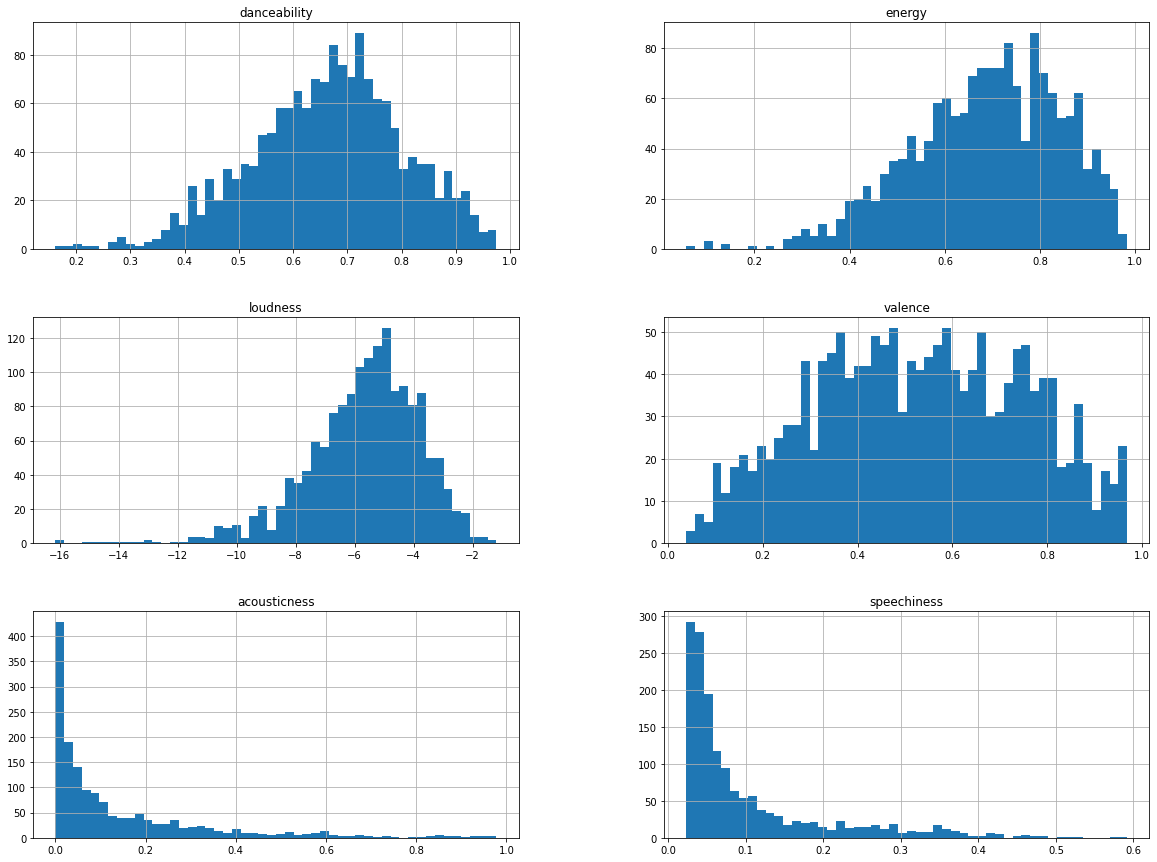

In [67]:
#let's take a look at the numeric attributes histograma:
atttibutes_hist = songs_df[["danceability", 'energy', 'loudness', 'valence','acousticness','speechiness']].hist(bins=50, figsize=(20,15))
atttibutes_hist

## Pearson's Correlation Matrix

Correlation between the output observations and the input features is very important and such features should be retained. However, if two or more than two features are mutually correlated, they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.

In [68]:
train_numeric=X_train[["danceability", 'energy', 'loudness', 'valence','acousticness','instrumentalness', 'liveness', 'tempo',
       'duration_ms', 'time_signature', 'popularity', 'rank','key']].copy()

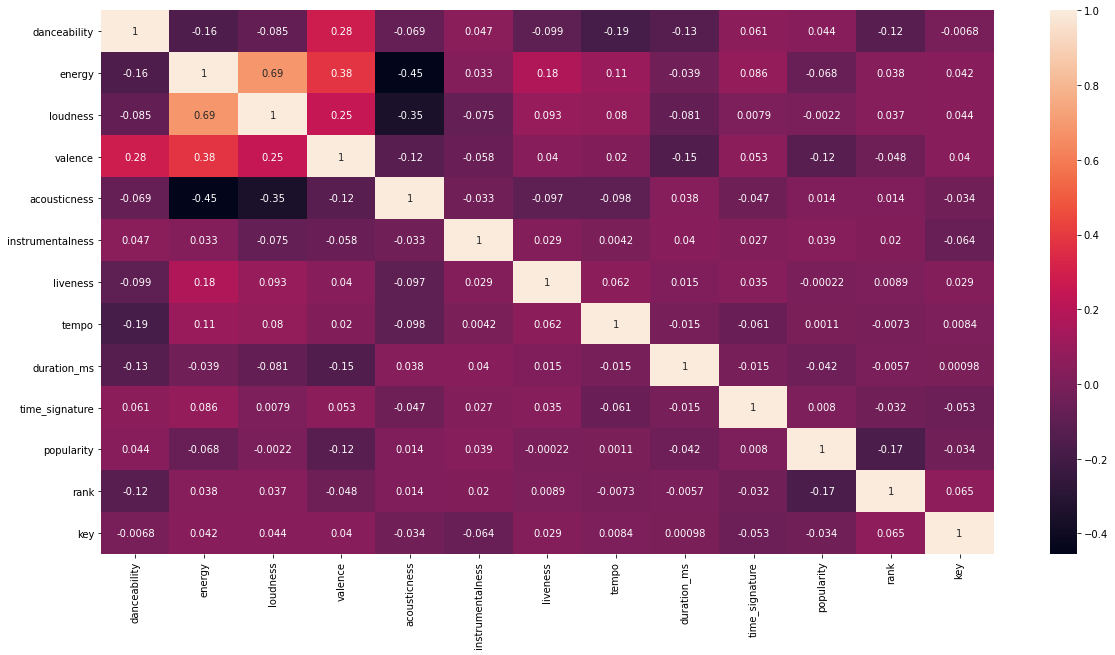

In [69]:
#checking correlation between numericals
plt.figure(figsize=(20,10))
sns.heatmap(train_numeric.corr(),annot=True);

features that have high correlation:
    
    *loudness and energy  - the more a song is loud, it has more energy 
    
    * popularity and rank - the more the song is popular, the more its' rank is high
    
     * danceability  and speechiness - 
    
    * acousticness and mode - 
    
   * acousticness and danceability 
    
   *acousticness and energy 
   
   * loudness and valance - the more a song is loud, its' valance is high ( it is more happy and cheerful)
   
   some of these correlations are very intuitive

looking at the  numeric features with the highest correlation:

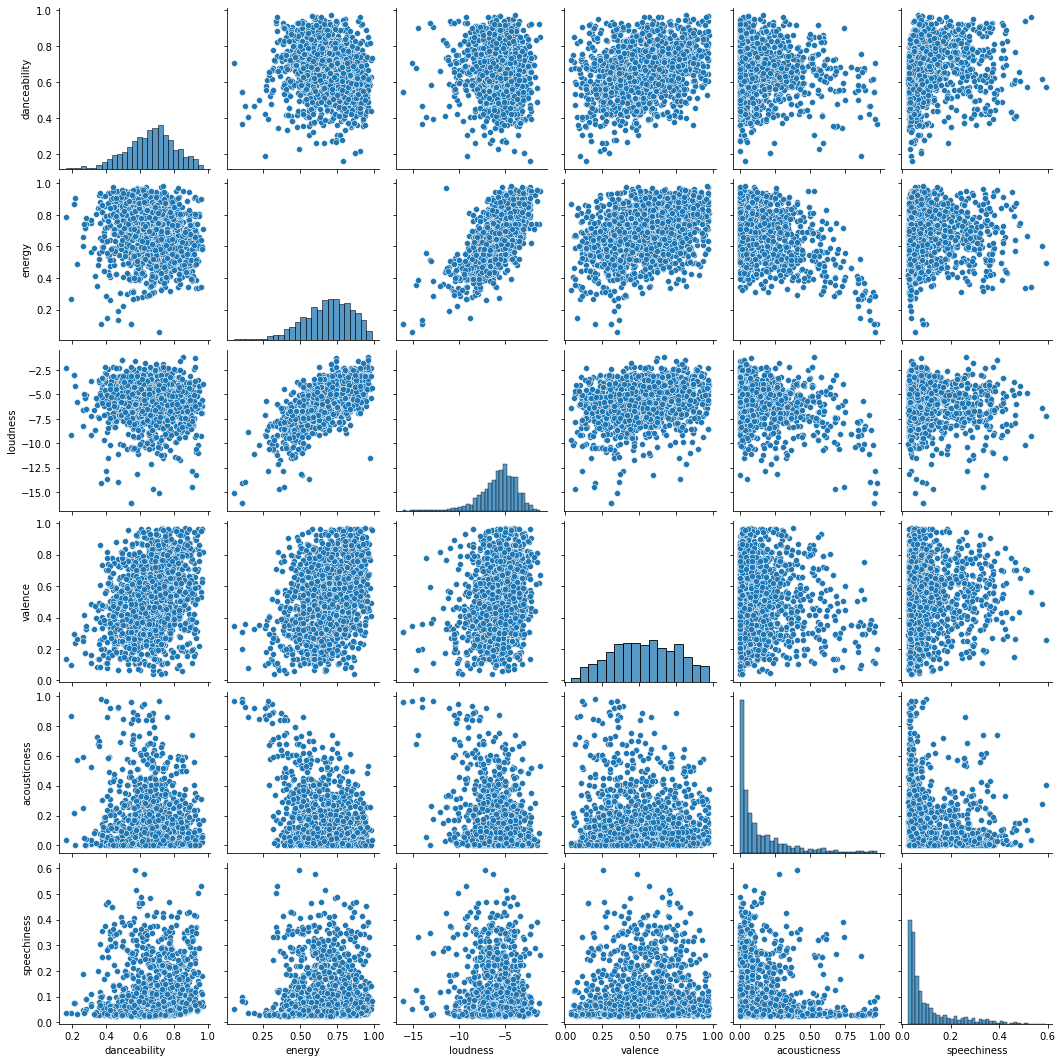

In [70]:

sns.pairplot(songs_df[["danceability", 'energy', 'loudness', 'valence','acousticness','speechiness']])

highly correlated and linear features: 
   * acousticness and energy
   * loudness and energy
   * energy and valance 
 
 less:
   * acousticness and loudness
   * energy and dancability

conclusion: energy is an important feature, we should keep it and might concider removing features that are highly correlated to it but less important.


# dealing with unbalanced data

NOTE: THE TEST SET SHOULD STAY UNBALANCED

note: we cant use the data after upsample for testing our model because it is balanced compared to the TEST SET which is unbalanced. more over, Even if we use the training data before over-sampling, so the ratio is the same, there is a risk of making a mistake due to over-fitting.

The solution is to use cross-validation and only after the split do over-sampling!

so we will do the over sampling during the model evaluation

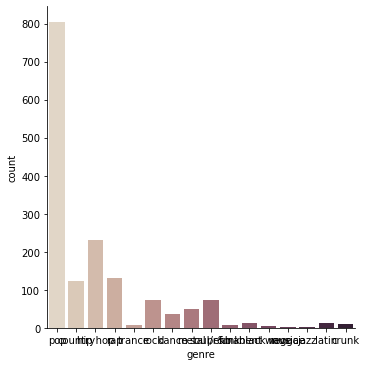

In [71]:
# showing that our data (for example- the genre column), is imbalanced
sns.catplot(x="genre", kind="count", palette="ch:.25", data=['pop','rock','jazz','r&b'])#songs_df)

In [72]:
X_train_standardized=X_train_standardized.dropna()

In [73]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# import the class
from sklearn.linear_model import LogisticRegression


In [74]:
from sklearn.model_selection import learning_curve 
#implementation
# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10,scoring='roc_auc', n_jobs=-1,train_sizes=linspace(0.1, 1.0, 5))  

In [75]:
Y_train.shape

(1185,)

In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
# random_state- Control the randomization of the algorithm.
#sampling_strategy is float only if the target is binary
#out target is nominal and not binary so we will define sampling_strategy with string - When str, specify the class targeted by the resampling. 
ros = RandomOverSampler(sampling_strategy='auto',random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train_standardized, Y_train)

from collections import Counter

# print(sorted(Counter(y_resampled).items()))

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({'country': 600, 'pop': 600, 'hip hop': 600, 'trance': 600, 'rap': 600, 'crunk': 600, 'rock': 600, 'soul/r&b': 600, 'jazz': 600, 'metal': 600, 'dance': 600, 'permanent wave': 600, 'latin': 600, 'funk': 600, 'black music': 600, 'reggae': 600})


In [78]:
ros.sampling_strategy_

OrderedDict([('black music', 596),
             ('country', 507),
             ('crunk', 597),
             ('dance', 573),
             ('funk', 594),
             ('hip hop', 432),
             ('jazz', 597),
             ('latin', 590),
             ('metal', 564),
             ('permanent wave', 590),
             ('rap', 493),
             ('reggae', 599),
             ('rock', 548),
             ('soul/r&b', 542),
             ('trance', 593)])

In [79]:
ros.sample_indices_

array([ 0,  1,  2, ..., 15, 15, 11], dtype=int64)

In [80]:
y_resampled

0       country
1       country
2           pop
3       country
4           pop
         ...   
9595     trance
9596     trance
9597     trance
9598     trance
9599     trance
Name: genre, Length: 9600, dtype: object

# Dummy model

we chose strategy="stratified" , since it is more sophisticated than strategy="most_frequent"

In [81]:
from sklearn.dummy import DummyClassifier
# defining the strategy
# dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf = DummyClassifier(strategy="stratified")

dummy_clf.fit(X_train, Y_train)
#dummy_clf.score(X_train, Y_train)
dummy_clf.predict(X_test)

#accuracy
dummy_clf.score(X_train, Y_train)




0.3012658227848101

# choosing models

## knn

first, we will use the standarized data

after that, in the cross validation, we will use the data after the oversampling

the metric we are using for this model - knn

In [82]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

In [83]:
k_mean_scores = []
k_std_scores = []

#specify tuning parameters
# we chose brute force, since our data is small: For small data sets ( less than 30 or so),  is comparable to , and brute force algorithms can be more efficient than a tree-based approach. 
knn_model = KNeighborsClassifier(n_neighbors=3,algorithm="brute")

# Fit the model with data (aka "model training")
knn_model.fit(X_train_standardized,Y_train) 
# change to X_resampled, y_resampled

#low cv value since we don't have a lot of samples in some classes
scores = cross_val_score(knn_model, X_train_standardized, Y_train,cv=2, scoring='accuracy')
k_mean_scores.append(scores.mean())
k_std_scores.append(scores.std())

d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
# Ks = pd.DataFrame(data = d, index=k_range)

In [85]:
#accuracy
scores

array([0.45699831, 0.46283784])

## Using a different value for K / cross validation

In [86]:
#specify tuning parameters
# we chose brute force, since our data is small: For small data sets ( less than 30 or so),  is comparable to , and brute force algorithms can be more efficient than a tree-based approach. 
knn_model = KNeighborsClassifier(n_neighbors=5,algorithm="brute")

# Fit the model with data (aka "model training")
knn_model.fit(X_train_standardized,Y_train)

KNeighborsClassifier(algorithm='brute')

In [87]:
# try K=1 through K=30 and plot testing accuracy
# del list
k_range = list(range(1, 5))
scores = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_standardized, Y_train)
    y_pred = knn_model.predict(X_train_standardized)
    scores.append(metrics.accuracy_score(Y_train, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

TypeError: 'list' object is not callable

In [ ]:
# max_score = max(scores)
# best_K = scores.index(max(scores))+1

# print("the first k value with best score is " + str(best_K) + " with accuracy of " + str(max_score))

In [ ]:
scores = cross_val_score(knn_model, X_train_standardized, Y_train,cv=2, scoring='accuracy')

k_range=list(range(1, 10))
k_mean_scores.append(scores.mean())

d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}

In [ ]:
print("Accuracy of the model for k=5, 2 folds in cross validation and 5 repetitions ")
scores

the scores aren't so good, we will do cross validation in order to find the most suitable k for the model.

### let's improve  and evaluate the knn model with the most simple metric -  accuracy
we will use the data after the oversampling, because now we are doing cross validation

so now we are doing hyperparameter tuning and trying to find the best hyperparameter, i.e, the best k for our model.

In [ ]:
k_range = list(range(1,31))
k_mean_scores = []
k_std_scores = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_resampled, y_resampled)
    scores = cross_val_score(knn_model, X_resampled, y_resampled, cv=10, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())
d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
Ks = pd.DataFrame(data = d, index=k_range)





much better results:

In [ ]:
print( "the mean accuracy in every fold:")
print( k_mean_scores) 


print(Ks)



In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
((ax1, ax2)) = ax

ax1.plot(k_range,d['k_mean'])
ax1.set_title('mean acurracy by K')
ax1.set_xlabel('Value of K for KNN')
ax1.set_ylabel('Testing Mean Accuracy')

ax2.plot(k_range, d['k_std'])
ax2.set_title('std scores by K')
ax2.set_xlabel('Value of K for KNN')
ax2.set_ylabel('Testing STD')

plt.tight_layout()
plt.show()

## Finding the best k using Random Search

now, in order to find the best k (hyperparameter) for the knn model , we will use random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#specify "parameter distribution" rather than "parameter grid"
param_grid=dict(n_neighbors=k_range)
print(param_grid)

In [ ]:
#n_iter: Number of random combinations it would try
#random_state: Reproducibility/ Set seed

rand = RandomizedSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=42)
rand.fit(X_resampled, y_resampled)


In [ ]:
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

overfitting! k is too small and the score is too high. 

In [ ]:
rand.best_estimator_

### on the training data: best score of knn model with k=1 accuracy metric: 0.9755555555555555


In [ ]:
best_knn = rand.best_estimator_
best_knn.fit(X_resampled, y_resampled)


#Call predict on the estimator with the best found parameters.
y_predictknn = best_knn.predict(X_test_standardized)
# mae_score = MAE(y_test, y_predict)




confusion_matrix(Y_test, y_predictknn)

In [ ]:
best_knn

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

plot_confusion_matrix(best_knn,X_resampled,y_resampled)

print(classification_report(Y_test,y_predictknn))

In [ ]:
metrics.accuracy_score(Y_test, y_predictknn)

#average='weighted',
#labels=np.unique(y_pred)

In [ ]:
metrics.f1_score(Y_test, y_predictknn, average='weighted',labels=np.unique(y_predictknn))

In [ ]:
metrics.precision_score(Y_test, y_predictknn, average='weighted',labels=np.unique(y_predictknn))

In [ ]:
# y_predict

In [ ]:
# metrics.recall_score(Y_test, y_predictknn, average='weighted',labels=np.unique(y_predictknn))

# Logistic Regression

notes:
  *  regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better.  ridge regression for example. 
   
  * penalty default is l2 , i.e, Ridge regression, which adds “squared magnitude” of coefficient as penalty term to the loss function.

* we selected multi_class="ovr" since out target variable is a non-binary multiclass - genres 

* If the option chosen is ‘ovr’, then a binary problem is fit for each label.

* solver =Algorithm to use in the optimization problem. 

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression(multi_class="ovr",solver="newton-cg" ,C=1e12, max_iter=100)

# fit the model with data
log_model= log_model.fit(X_train_standardized, Y_train)
# change to X_resampled, y_resampled


# # predict the response for new observations
# logreg.predict(X_new)

In [ ]:
log_model.score(X_train_standardized, Y_train)

the score is low! let's do cross validation

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3,random_state=42)

In [ ]:
cv = RepeatedKFold(n_splits=15, n_repeats=3, random_state=42)
# create model
log_model = LogisticRegression(multi_class="ovr",solver="newton-cg" )

# evaluate model
scores = cross_val_score(log_model, X_train_standardized, Y_train, scoring='accuracy', cv=cv, n_jobs=1)
log_model= log_model.fit(X_train_standardized, Y_train)

# report performance
print('Accuracy:', (mean(scores)))

as we can see, the accuracy isn't good.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

### let's see if we can have a better score with AUC-ROC curve

* The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems, BUT IT ALSO CAN BE USED FOR MULTI CLASS (as we did in the code below).

* It is a probability curve that plots the TPR (true positive rate) against FPR (false positive rate) at various threshold values and essentially separates the ‘signal’ from the ‘noise’.
 
* The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

* The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# model = LogisticRegression as we saw berofe
# model_ovr= model.fit(X_train_standardized, Y_train) already did it in thee previous

y_preb_probs=log_model.predict_proba(X_train_standardized)

#setting multi_class=”ovr”
#Note: multiclass ROC AUC currently only handles the ‘macro’ and ‘weighted’ averages.
#"weighted":Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

roc_auc_score( Y_train, y_preb_probs, average="weighted", multi_class="ovr")

# grid search for hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#model = LogisticRegression(multi_class="ovr")

In [ ]:
k_range=list(range(1,31))
print(k_range)

In [ ]:
param_grid=dict(penalty=['l2'],solver=['newton-cg'])
print(param_grid)

In [ ]:
# 'roc_auc_ovr' - Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
grid = GridSearchCV(log_model, param_grid, cv=10, scoring='roc_auc_ovr',n_jobs=1)

In [ ]:
grid.fit(X_resampled, y_resampled)

In [ ]:
# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)

### best training score of Logistic Regression model with hyperparameters {'penalty': 'l2', 'solver': 'newton-cg'} and roc_auc_ovr metric: 0.917885582010582

In [ ]:
# best_lr=grid.best_estimator_
# y_predictlr = best_lr.predict(X_test_standardized)

In [ ]:
confusion_matrix(Y_test,y_predictlr)

In [ ]:
# from sklearn.metrics import plot_confusion_matrix,classification_report

# plot_confusion_matrix(best_lr,X_resampled,y_resampled)


# print(classification_report(Y_test,y_predictlr))



In [ ]:
# metrics.accuracy_score(Y_test, y_predictlr)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

side note: #Gini Impurity is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree. More precisely, the Gini Impurity of a dataset is a number between 0-0.5, which indicates the likelihood of new, random data being misclassified if it were given a random class label according to the class distribution in the dataset.

now, we are using the resampled x,y in the cross validation

In [ ]:
# define model

dt_model = DecisionTreeClassifier(max_depth = 2,random_state=42).fit(X_resampled, y_resampled)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(dt_model,X_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=1)

In [ ]:
scores

In [ ]:

from sklearn.metrics import confusion_matrix



In [ ]:
# dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_resampled, y_resampled)

In [ ]:
###################################### לשיפור התוצאה
dt_model.tree_.max_depth
# זה מראה לי את העומק המקסימלי של העץ, אני צריכה לעשות נמוך יותר 

In [ ]:
dt_model.pra()

In [ ]:
#  y_pred = dtree_model.predict(X_resampled)

In [ ]:
# dtree_model = DecisionTreeClassifier().fit(X_resampled, y_resampled)

In [ ]:
#  y_pred = dt_model.predict(X_resampled)

In [ ]:
#specify "parameter distribution" rather than "parameter grid"
param_grid={'criterion': ['gini', 'entropy']}
print(param_grid)

In [ ]:
#n_iter: Number of random combinations it would try
#random_state: Reproducibility/ Set seed


dt = RandomizedSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=42,return_train_score=True)
dt.fit(X_resampled, y_resampled)





In [ ]:
print(dt.best_score_)
print(dt.best_params_)
print(dt.best_estimator_)

In [ ]:
dt.cv_results_

### best score of Decision Tree Classifier model with hyperparameters {'criterion': 'gini'}and roc_auc_ovr metric: 0.9744444444444443

In [ ]:
best_dt = dt.best_estimator_
best_dt.fit(X_resampled, y_resampled)

#Call predict_proba on the estimator with the best found parameters.
# R2_score =best_knn.score(X_test_standardized,Y_test) 

#Call predict on the estimator with the best found parameters.

# y_predictdt = best_dt.predict(X_test_standardized)

# mae_score = MAE(y_test, y_predict)

confusion_matrix(Y_test, y_predictdt)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

from sklearn.metrics import ConfusionMatrixDisplay

plot_confusion_matrix(best_dt,X_resampled,y_resampled)


print(classification_report(Y_test,y_predictdt))

ConfusionMatrixDisplay.from_estimator(best_dt, X_test_standardized, Y_test)

plt.show()




In [ ]:
# ConfusionMatrixDisplay.from_predictions(Y_test, y_predictdt)

In [ ]:
# metrics.f1_score(Y_test, y_predictdt, average='weighted',labels=np.unique(y_predictdt))

In [ ]:
# metrics.accuracy_score(Y_test, y_predictdt)

# ensamble learning

decision tree, logistic regression, knn

In [1]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
log_clf = log_model  #LogisticRegression()
rnd_clf = dt_model  #RandomForestClassifier()
knn_clf= knn_model #KNeighborsClassifier()

voting_clf = VotingClassifier(
 estimators=[('lr', log_model), ('dt', dt_model), ('knn', knn_model)],
 voting='soft')
voting_clf.fit(X_resampled, y_resampled)

<!-- . Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it -->

<!-- . Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it -->

# feature importance

. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it